# DAMA Day Workshop

## Welcome to this DAMA Day Workshop!
If you have any questions about this notebook, please contact us:  
Victoria Da Poian (victoria.dapoian@nasa.gov)  
Eric Lyness (eric.i.lyness@nasa.gov)  

### In this notebook:
- Processing the Data
- Exploring the Data 
- Putting data in a ML format
- Provide some ideas / actions to work on during the workshop (or after :D)

Data = Csv file with :
- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for parameters (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

### Python Environment Setup

#### (1) If you gitclone, running it locally/VM

In [1]:
!pwd

/Users/soyoungpark/Desktop/DAMADAY2020_NASA


In [2]:
!ls -lrt #You will see files, as following.

total 1104016
-rw-r--r--@ 1 soyoungpark  staff  110976485 Sep 24 10:48 ml_data_damaday.csv
-rw-r--r--@ 1 soyoungpark  staff  190712153 Sep 29 16:16 DataScienceUMDTalk_MOMAML_1505 (1).pptx
-rw-r--r--@ 1 soyoungpark  staff       1069 Oct  6 19:00 LICENSE
-rw-r--r--  1 soyoungpark  staff       2341 Oct  7 09:37 README.md
-rw-r--r--@ 1 soyoungpark  staff  111324662 Oct  7 13:05 SpectraInArrayInOneColumn.csv
-rw-r--r--@ 1 soyoungpark  staff  107698487 Oct  8 15:13 ml_data_damaday_final_VDP.csv
-rw-r--r--@ 1 soyoungpark  staff     145138 Oct  8 19:25 SoyoungEDALocal.ipynb
-rw-r--r--@ 1 soyoungpark  staff     128729 Oct  9 08:28 NotebookWorkshop_VDP.ipynb
drwxr-xr-x  5 soyoungpark  staff        160 Oct 12 07:09 training_1
-rw-r--r--@ 1 soyoungpark  staff     869507 Oct 15 06:02 SoyoungAppendToVDP.ipynb
drwxr-xr-x  3 soyoungpark  staff         96 Oct 15 06:46 saved_model
-rw-r--r--  1 soyoungpark  staff    9017648 Oct 15 10:52 my_model0.h5
-rw-r--r--  1 soyoungpark  staff        555 Oct 15 12:

In [3]:
!pip install -r requirement.txt #This is only needed when you initiate the python environment for the first time.

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirement.txt'


In [4]:
!which python #This python interpreter is what you will use for this notebook. 

/Users/soyoungpark/anaconda3/bin/python


In [5]:
!echo $CONDA_DEFAULT_ENV #this is the name of your Conda Python Environment 

base


In [6]:
from platform import python_version

print(python_version())

3.7.6


#### (2) if you run in Zepl, use "DAMA_Python3" image

In [7]:
#!pip install tensorflow==2.3.1 scikit-learn matplotlib optuna #Everytime you instantiate a new image, you need to re-install these following packages or you use custom image "DAMA_Python" in Resorces section

In [8]:
#!pip list

### Getting ready - Snowflake + Zepl connection

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### (1) From Zepl, Download data from Snowflake
Q: is snowflake connector, z available in pip?

In [10]:
# %python
# import snowflake.connector
# import hashlib

# class SnowflakeDataSource:
#     SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

#     def init_snowflake(self):
#         options = {
#             "account": self.account,
#             "user": self.user,
#             "password": self.password,
#             "database": self.database,
#             "schema": self.schema,
#             "role": self.role,
#             "warehouse": self.warehouse,
#             "authenticator": self.authenticator,
#             "application": self.application
#         }

#         if self.authenticator == "oauth":
#             options["token"] = self.token

#         return snowflake.connector.connect(**options)

#     def init_snowflake_spark(self):
#         sfOptions = {
#             "sfURL": "{}.snowflakecomputing.com".format(self.account),
#             "sfUser": self.user,
#             "sfPassword": self.password,
#             "sfDatabase": self.database,
#             "sfSchema": self.schema,
#             "sfRole": self.role,
#             "sfWarehouse": self.warehouse,
#             "sfAuthenticator": self.authenticator,
#             "application": self.application
#         }

#         if self.authenticator == "oauth":
#             sfOptions["sfToken"] = self.token

#         return spark.read.format(self.SNOWFLAKE_SOURCE_NAME).options(**sfOptions)

#     def establish_connection(self):
#         if self.is_spark():
#             df = self.init_snowflake_spark()
#             z.addDatasource(self.name, df)
#         else:
#             con = self.init_snowflake()
#             z.addDatasource(self.name, con.cursor())
#             z.addDatasource("{}_con".format(self.name), con)

#     def is_spark(self):
#         try:
#             spark
#         except NameError:
#             return False

#         return True

#     def __init__(self, name, account, user, password, database, schema, role, warehouse, authenticator, token, clientId, clientSecret, application):
#         self.name = name
#         self.account = account
#         self.user = user
#         self.password = password
#         self.database = database
#         self.schema = schema
#         self.role = role
#         self.warehouse = warehouse
#         self.authenticator = authenticator
#         self.clientId = clientId
#         self.clientSecret = clientSecret
#         self.token = token
#         self.application = application


#         m = hashlib.md5()
#         # We don't include the token since with the current implementation it will change frequently, but it's not necessary to update the connection with new tokens.
#         m.update(account.encode('utf8') + user.encode('utf8') + password.encode('utf8') + database.encode('utf8') + schema.encode('utf8') + role.encode('utf8') + warehouse.encode('utf8') + authenticator.encode('utf8')+ clientId.encode('utf8') + clientSecret.encode('utf8') + application.encode('utf8'))
#         currentConnectionParamsHash = m.hexdigest()
#         try:
#             z.getDatasource(name)
#         except DatasourceException:
#             # Connection doesn't exist, we need to establish a new one.
#             self.establish_connection()
#             z.add('CONNECTION_PARAMETERS_HASH', currentConnectionParamsHash)
#         else:
#             # A connection exists, we now check whether any connection parameters have changed since the last connection was established.
#             previousConnectionParamsHash = z.get('CONNECTION_PARAMETERS_HASH')
#             if currentConnectionParamsHash != previousConnectionParamsHash:
#                 # Connection parameters have changed, re-establish connection.
#                 self.establish_connection()
#                 z.add('CONNECTION_PARAMETERS_HASH', currentConnectionParamsHash)

# SnowflakeDataSource(name="DAMA_CSV_parkso3", account="RM42265.west-us-2.azure", user="parkso3", password="IloveBrianCMU@1", database="NASA_CSV",
#                     schema="DAMA_DAY_NASA", role="", warehouse="COMPUTE_WH", authenticator="snowflake", clientId="",
#                     clientSecret = "", token="", application="Zepl")

# import pandas as pd
# # establish connection to Snowflake
# cur =z.getDatasource("DAMA_CSV_parkso3")

# #cur = z.getDatasource("NASA_CSV")

# # execute query
# cur = cur.execute('SELECT * FROM dama_nasa_demo_data')# LIMIT 100

# # convert datasource into pandas dataframe
# dataset = cur.fetch_pandas_all()

# # print dataframe as table
# z.show(dataset)

#### (2) or Read csv file

In [11]:
dataset = pd.read_csv('ml_data_damaday_final_VDP.csv')  
dataset.head(2)

NameError: name 'pd' is not defined

### Processing and Exploring the Data

### The data we are using in this notebook is csv file

- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for parameters (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [12]:
import pandas as pd
import os
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
##added by Vic
dataset = pd.read_csv('ml_data_damaday_final_VDP.csv')  
dataset.head(2)

,USID,0,1,2,3,4,5,6,7,8,...,1950,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Label1,Label2
0,8198000001,0,0,0,0,0,0,0,0,0,...,0,12.6549,5,0.463842,1,3812,83,0.01,A,10
1,8198000002,0,0,0,0,0,0,0,0,0,...,0,12.2765,5,0.644139,1,2891,99,0.01,A,10


### Analysis of the Columns (USID, Mass Spec, Params, Labels)

In [14]:
###Columns names
columns_names = dataset.columns.tolist()
print(columns_names[-9:])

###Parameters
listAllParams = columns_names[-9:-2]
nberParams = len(listAllParams)
dataset_params = dataset[listAllParams]
print(dataset_params)

###Y values (2 options for the labels)
y_1 = dataset.Label1
y_2 = dataset.Label2

###Define X values (all the dataset, only mass spec data, mass spec data + params)
Xall = dataset.drop(['Label1','Label2'],axis=1) #all data
XnoUSID = Xall.drop(['USID'],axis=1) #all data without USID
XmassSpec = XnoUSID.drop(listAllParams, axis=1) #just mass spec data
print("XmassSpec.shape",XmassSpec.shape)

['Param1', 'Param2', 'Param3', 'Param4', 'Param5', 'Param6', 'Param7', 'Label1', 'Label2']
        Param1  Param2    Param3  Param4  Param5  Param6     Param7
0      12.6549       5  0.463842       1    3812      83   0.010000
1      12.2765       5  0.644139       1    2891      99   0.010000
2      12.7667       5  0.417654       1    2720     102   0.010000
3      12.4442       5  0.712478       1    1961      86   0.010000
4      13.1107       5  0.566622       1    2652      98   0.010000
...        ...     ...       ...     ...     ...     ...        ...
26680  50.5495       1  0.000000       1     767      13  35.279999
26681  50.5172       1  0.000000       1     635      11  35.619999
26682  50.5172       1  0.000000       1     676      13  33.009998
26683  50.5495       1  0.000000       1     757      13  31.400000
26684  50.5172       1  0.000000       1     686      15  31.540001

[26685 rows x 7 columns]
XmassSpec.shape (26685, 1951)


In [ ]:
# n, bins, patches = plt.hist(dataset.Label1)
# plt.xlabel('Label1')
# plt.ylabel('Count')
# plt.show()

### Define your inputs X and Y

In [15]:
###Here you select the params you want to remove 
listParams = [] #no params to remove
#listParams = ["Param1", "Param2"] #if you want to remove Param1 and Param2


def getRawXy(dataset, listParams, y): #Vic updated this function
    #Which input data X do you want to use?
    X = XnoUSID.drop([param for param in listParams], axis=1)
    inputSize = X.shape[1]
    print(X[:10])
    
    nb_categories = len(pd.unique(y))
    print(nb_categories)

    return X, y, XmassSpec, nb_categories

X, y, XmassSpec, nb_categories = getRawXy(dataset, listParams, y_1)

   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0.417654       1    2720     102 

### Plot some mass specs

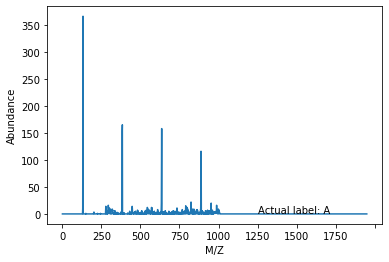

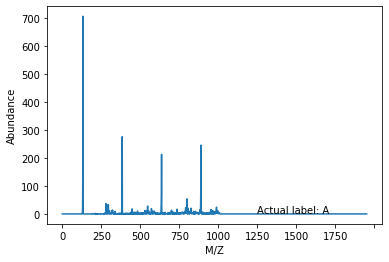

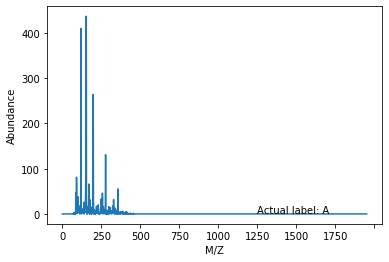

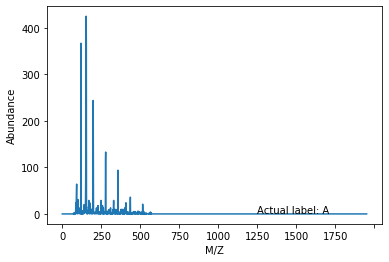

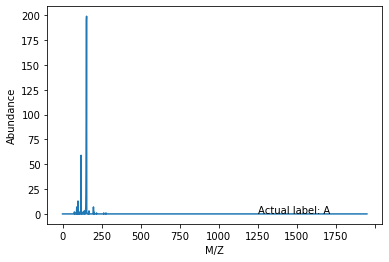

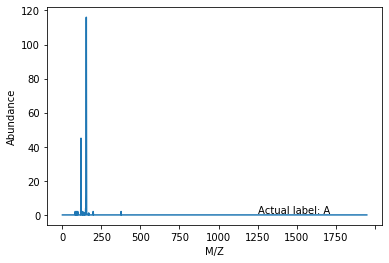

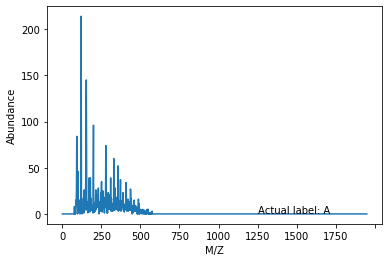

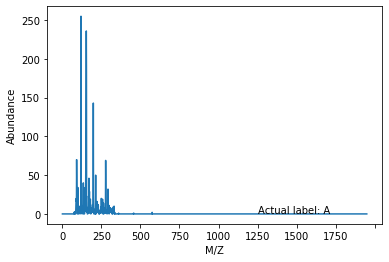

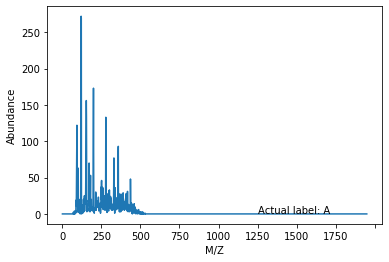

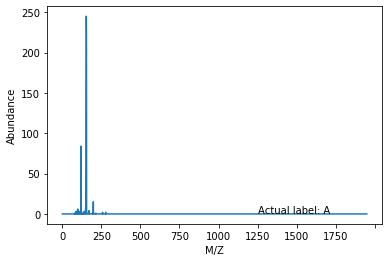

In [16]:
#Mass spec data only
XmassSpec_df = X.drop(['Param1', 'Param2', 'Param3', 'Param4','Param5', 'Param6', 'Param7'], axis=1) 

def plot_oneSpectra(i, XmassSpec_df, y):
    onemassSpec=XmassSpec_df.iloc[i]
    onelabel=y[i]
    plt.text(1250, 1, 'Actual label: {}'.format(str(y[i])))
    ax=onemassSpec.plot()
    ax.set_ylabel('Abundance')
    ax.set_xlabel('M/Z')
    plt.show()
    
for i in range(1,100,10):
    plot_oneSpectra(i, XmassSpec_df, y)

## Processing our data for ML approach

### Encode the labels as integer values

In [17]:
#Victoria's 6 column Y
#TO REWORK VIC
#Victoria's 6 column Y

def encoder(dataToEncode): #encode label values (label1 label2) as integer values
    #Soyoung add comment-Label
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    print("encoded_Y", encoded_Y.shape, encoded_Y[:2])
    classes = encoder.classes_
    # convert the vector of integers to dummy variables (i.e. one hot encoded) 
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = encoded_Y.reshape(len(encoded_Y), 1) #Soyoung commented out for 1DCNN training
    Y = onehot_encoder.fit_transform(integer_encoded)
    return(Y) #Soyoung changed from original Y(Onehotencoder) to encoded_Y(labelEncoder)

def printEncodertoLabels(dataToEncode): # print the relations between the class values and the encoded integers
    nb_categories = len(pd.unique(dataToEncode))
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    for i in range(nb_categories):
        print(str(i) + " : " + encoder.inverse_transform([i]))
        
printEncodertoLabels(y)


#Soyoung to transform from raw ABCD y to 1 column integer classfication y
def getLabelEncodedy(y):
    encoder_l = LabelEncoder()
    encoded_y = encoder_l.fit_transform(y)
    #print("encoded_y", encoded_y.shape, encoded_y[:10])    
    return encoded_y

yencoded=getLabelEncodedy(y)

['0 : A']
['1 : B']
['2 : C']
['3 : D']
['4 : E']
['5 : F']


In [18]:
# ### check clasification distribution
# n, bins, patches = plt.hist(y)
# plt.xlabel('Label1')
# plt.ylabel('Count')
# plt.show()

### Let's split the dataset into training, testing sets.

In [19]:
###Split dataset ratios
train_test_ratio = 0.2 #80% is used for the training
test_val_ratio = 0.5 #Half for validation, half for testing

def preprocess_dataset(dataset, y):
    X, y, XmassSpec, nb_labels = getRawXy(dataset, listParams, y)
    yencoded=getLabelEncodedy(y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, yencoded, test_size=train_test_ratio)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = preprocess_dataset(dataset, y)
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0.417654       1    2720     102 

# Classification Approach and Outlier Detection Problem

The purpose of the following is to provide the audience a structure for several tasks / subtasks that could be investigated during the workshop. It is to facilitate each participant to jump on the task they are interested into!

### SOYOUNG, do you think we could put this at the end of the notebook, so people dont go study and read all these links during the workshop? and so you can jump directly on the ideas you developed??


The following example approaches (TO DO part) are provided by   
Soyoung Park, Data Scientist at Lam Research  
Email: soyoung.park.mse@gmail.com

#### Various approaches in high level
1. [machine learning based](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)

##### Outlier Detection and Removal  

Dataset and Performance Baseline  
 -  House Price Regression Dataset  
 -  Baseline Model Performance  

Automatic Outlier Detection  
 -  Isolation Forest  
 -  Minimum Covariance Determinant  
 -  Local Outlier Factor  
 -  One-Class SVM  

[sklearn code is here](https://scikit-learn.org/stable/modules/outlier_detection.html)


2. [DEEP LEARNING FOR ANOMALY DETECTION: A SURVEY](https://arxiv.org/pdf/1901.03407.pdf)
Potential flow #1
Step 1. Feature extraction to a single number per scan based on (ref 1)  
Step 2. Multiclass classification (ref 2)  
Step 3. Show probability of each class 

Potential flow #2
Step 1. Feature extraction to a single number per scan based on (ref 1)  
Step 2. show probability off of clusters (ref 3)  

(ref 1) [PCA-Kmeans/GMM clustering](https://github.com/parksoy/Udacity_nanoDegree_MachineLearning/blob/master/customer_segments/customer_segments.ipynb)  

(ref 2) [ML Classifier based](https://github.com/parksoy/Udacity_nanoDegree_MachineLearning/blob/master/finding_donors/finding_donors.ipynb)
 - randomforest classifier  
 - decision tree classifier  
 - SVC  
 - Radial Basis Function (RBF)

(ref 3) [Univariate Outlier detection -statistically](https://towardsdatascience.com/a-complete-anomaly-detection-algorithm-from-scratch-in-python-step-by-step-guide-e1daf870336e)  

### Multiclassification Problem 
##### Define your model

In [20]:
#Without manual feature engineering/dimentionlity reduction  
#Main reference: https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2c
        
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Reshape,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#X_train: (21348, 1958)
#Y_train: (21348, )
n_spectrastep=X_train.shape[1]
num_sensors=1
output_classes=to_categorical(Y_train).shape[1]

def baseline_model(output_classes):
    #Simplest 1 layer 1DCNN
    model0 = models.Sequential()
    model0.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model0.add(Conv1D(filters=64, kernel_size=10, activation='relu')) 
    model0.add(Flatten()) 
    model0.add(Dense(output_classes,  activation='softmax'))
    model0.summary()
    return model0

model0=baseline_model(output_classes)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1958, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1949, 64)          704       
_________________________________________________________________
flatten (Flatten)            (None, 124736)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 748422    
Total params: 749,126
Trainable params: 749,126
Non-trainable params: 0
_________________________________________________________________


### Soyoung, what do you think if we put references at the end or in another doc in parallel
References
https://www.datacamp.com/community/tutorials/cnn-tensorflow-python
https://www.tensorflow.org/guide/keras/sequential_model  
https://www.tensorflow.org/tutorials/images/cnn  
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/  
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/  
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/  

##### Train the model

In [21]:
BATCH_SIZE=32
SEED=42

# save model
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

##################
#[1] Onetime fit  
#https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
##################
 
def fit(model, EPOCHS):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit([X_train], 
                            batch_size=BATCH_SIZE, 
                            y=to_categorical(Y_train), \
                            verbose=1, \
                            validation_split=0.25, 
                            shuffle=True, 
                            epochs=EPOCHS, 
                            callbacks=[cp_callback])
    return history

history0=fit(model0, EPOCHS=3)  


##################
#[2] Cross validation
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# ##################
# estimator = KerasClassifier(build_fn=baseline_model, \
#                             epochs=1, batch_size=BATCH_SIZE, verbose=1)

# kfold = KFold(n_splits=3, shuffle=True, random_state=SEED)
# results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# ##################

Epoch 1/3
500/501 [============================>.] - ETA: 0s - loss: 2.1116 - accuracy: 0.8106
Epoch 00001: val_loss improved from inf to 1.04752, saving model to training_1/cp.ckpt
501/501 [==============================] - 11s 23ms/step - loss: 2.1106 - accuracy: 0.8105 - val_loss: 1.0475 - val_accuracy: 0.8100
Epoch 2/3
499/501 [============================>.] - ETA: 0s - loss: 0.4272 - accuracy: 0.8968
Epoch 00002: val_loss improved from 1.04752 to 0.28729, saving model to training_1/cp.ckpt
501/501 [==============================] - 13s 26ms/step - loss: 0.4270 - accuracy: 0.8969 - val_loss: 0.2873 - val_accuracy: 0.9020
Epoch 3/3
500/501 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.9298
Epoch 00003: val_loss improved from 0.28729 to 0.28416, saving model to training_1/cp.ckpt
501/501 [==============================] - 15s 30ms/step - loss: 0.2333 - accuracy: 0.9298 - val_loss: 0.2842 - val_accuracy: 0.9166


##### Evaluate the model

### Soyoung, I could not plot the accuracy here

167/167 - 1s - loss: 0.2776 - accuracy: 0.9176
Restored model, accuracy: 91.76%


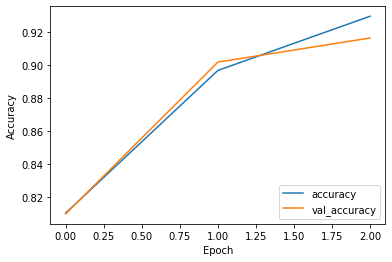

In [22]:
#plot accuracy, loss during training and validation
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
     
plot_history(history0)

loss, acc = model0.evaluate(X_test,  to_categorical(Y_test), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

##### Save the model (HDF5 file) - retrieve the model

In [23]:
# The '.h5' extension indicates that the model should be saved to HDF5.
model0.save('my_model0.h5') 

! ls -lrt

total 1103848
-rw-r--r--@ 1 soyoungpark  staff  110976485 Sep 24 10:48 ml_data_damaday.csv
-rw-r--r--@ 1 soyoungpark  staff  190712153 Sep 29 16:16 DataScienceUMDTalk_MOMAML_1505 (1).pptx
-rw-r--r--@ 1 soyoungpark  staff       1069 Oct  6 19:00 LICENSE
-rw-r--r--  1 soyoungpark  staff       2341 Oct  7 09:37 README.md
-rw-r--r--@ 1 soyoungpark  staff  111324662 Oct  7 13:05 SpectraInArrayInOneColumn.csv
-rw-r--r--@ 1 soyoungpark  staff  107698487 Oct  8 15:13 ml_data_damaday_final_VDP.csv
-rw-r--r--@ 1 soyoungpark  staff     145138 Oct  8 19:25 SoyoungEDALocal.ipynb
-rw-r--r--@ 1 soyoungpark  staff     128729 Oct  9 08:28 NotebookWorkshop_VDP.ipynb
drwxr-xr-x  5 soyoungpark  staff        160 Oct 12 07:09 training_1
-rw-r--r--@ 1 soyoungpark  staff     869507 Oct 15 06:02 SoyoungAppendToVDP.ipynb
drwxr-xr-x  3 soyoungpark  staff         96 Oct 15 06:46 saved_model
-rw-r--r--  1 soyoungpark  staff        555 Oct 15 12:18 encoderAnomalytest.ipynb
-rw-r--r--  1 soyoungpark  staff     22561

In [24]:
# Recreate the exact same model, including its weights and the optimizer
pretrained_model = tf.keras.models.load_model('my_model0.h5')

# Show the model architecture
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1958, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1949, 64)          704       
_________________________________________________________________
flatten (Flatten)            (None, 124736)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 748422    
Total params: 749,126
Trainable params: 749,126
Non-trainable params: 0
_________________________________________________________________


In [25]:
#confirm, pretrained model is performaing the same way as when it was trained.
loss, acc = pretrained_model.evaluate(X_test,  to_categorical(Y_test), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

167/167 - 1s - loss: 0.2776 - accuracy: 0.9176
Restored model, accuracy: 91.76%


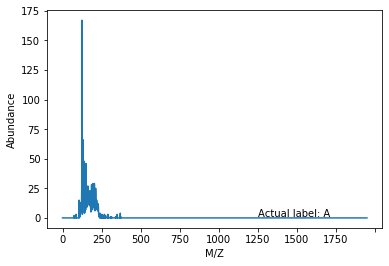

For sample i = 3309 predicted Label [0 1 2 3 4 5]: 4
Accuracy score: 0.9175566797826494


In [26]:
#inter a class/label for a random Xtest data
from sklearn.metrics import accuracy_score

XmassSpec_df=X_test.drop(['Param1', 'Param2', 'Param3', 'Param4','Param5', 'Param6', 'Param7'], axis=1) 

# plot one test sample spectra
i=np.random.randint(len(X_test))
plot_oneSpectra(i, XmassSpec_df, y)
    
# Infer with the pre-trained model    
predicted = pretrained_model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
 
# print("For sample i =", i, "predicted Label [0,1,2,3,4,5]:", predicted[i])
print("For sample i =", i, "predicted Label {}:".format(np.unique(yencoded)), predicted[i])
print("Accuracy score:", accuracy_score(Y_test, predicted)); 

##### Improve model (architecture, hyperparameters tuning, ...)

In [ ]:
## Architecture of the model

def build_improved_model(output_classes):
    model1= models.Sequential()
    model1.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model1.add(BatchNormalization())
    model1.add(Conv1D(filters=256, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Flatten()) 
    model1.add(Dense(output_classes, activation='softmax'))   
    model1.summary()
    return model1

model1=build_improved_model(output_classes)
history1=fit(model1, EPOCHS=2) #Check if model runs or not with EPOCHS=1 first, then, increase EPOCHS.
plot_history(history1)

In [ ]:
## Hyperparameters tuning

# (1) define default hyperparameters you want to optimize
class Args:
    #learning
    BATCH_SIZE=32
    EPOCHS=3
    
    #1DCNN
    NumFilter1DCNN=64
    KERNEL_SIZE=3
    
args=Args()

# (2) parameterize all hyperparameters 
def build_improved_model_parameterized(output_classes):
    model2= models.Sequential()
    model2.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model2.add(BatchNormalization())
    model2.add(Conv1D(filters=256, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))
    model2.add(Flatten()) 
    model2.add(Dense(output_classes, activation='softmax'))   
    model2.summary()
    return model2

#(3) train the model with many different combination of hyperparameters either 
# (a) with simple for loop/ distributed spark jobs (one combination-onerun/one node)
# (b) with commercial open source packages or 
#     There are many Hyperparameter optimization methodology, one of them 
#     I was personally interested in trying was https://optuna.org/

#Misc; Tensorboard (tensorflow sub-dependent package) is another useful tool to use.
#in CLI, tensorboard --logdir=logs\\scalars --host="" 

In [ ]:
#TO DO: Plot ROC, Confution matrix, F2 score. 
#For Precision and recall are key parameters to measure the accuracy of the classifier.

### Anomaly Detection Problem

### SOYOUNG, same here, could we leave the 2 titles below and put the other references at the bottom?

##### Unsupervised Anomaly Detection with Autoencoder Approach

##### Feature extraction, then, visualize clusters to see how distribution looks like



Deep Anomaly Detection/Feature extraction references  

1. [Unsupervised Anomaly Detection in Multivariate SpatioTemporal Datasets using Deep Learning](https://project.inria.fr/aaltd19/files/2019/08/AALTD_19_Karadayi.pdf)  

Local Outlier Factor (LOF), is one of the most popular algorithms that quantifies
the outlierness of an object.    

2. [how to build autoencoder](https://www.pyimagesearch.com/2020/02/17/autoencoders-with-keras-tensorflow-and-deep-learning/)
3. [CNN-LSTM Encoder-Decoder based anomaly detection](https://www.mdpi.com/2076-3417/10/15/5191/pdf)  
4. [VGG-16 net->PCA clustering-> feature vector for turbine blades failure detection](https://www.mdpi.com/2076-3417/10/15/5191/pdf)  
5. [Traditional models review](https://www.sciencedirect.com/science/article/pii/S2590198220300233)
traditional models often fail to fully capture complex structures in the data  
 - using parametric and non-parametric statistical models, 
 - data clustering, 
 - rule-based systems, 
 - mixture models, 
 - and SVMs (Support Vector Machines)
 - 
 
 
 6. [Unsupervised Anomaly Detection in Multivariate
Spatio-Temporal Data Using Deep Learning: Early
Detection of COVID-19 Outbreak in Italy](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9187620)

7. [](https://arxiv.org/pdf/1901.03407.pdf)




### Other ideas for classification / detection

In [ ]:
#TO DO:

# Artifical Data Generation

The purpose of the following is to provide the audience a structure for several tasks / subtasks that could be investigated for the generation of artificial data to increase the volume of our dataset.

### How can we make more data? 
#### Transfer learning is still a big question mark, how is it implementable? What is the best way?  

#### GANs

#### Autoencoders

TO DO: Augment data with simulation generating mass spectra. 
http://physics.bu.edu/~duffy/HTML5/mass_spectrometer.html

### Other ideas

TO DO: Domain specific
https://venturebeat.com/2020/10/08/the-secrets-of-small-data-how-machine-learning-finally-reached-the-enterprise/amp/
https://www.youtube.com/watch?v=vbhEnEbj3JM


In [ ]:
#realtime decision making
https://github.com/parksoy/Soyoung_Udacity_ND_DeepReinforcementLearning/tree/master/p1_navigation


## Thank you so much to all of you, especially the DAMA people and our amazing volunteers Soyoung and Tal!
### Feel free to contact us (Eric eric.i.lyness@nasa.gov and me victoria.dapoian@nasa.gov)